In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import string

In [ ]:
sentences = ['The cat sat on the mat',
             'The dog sat on the log',
             'Cats and dogs are great?',
             'Sitting on the log is fun',
             'dogs are great companions!',
             'The cat is a great companion',
             'On a sunny day a cat sat on the mat.',
             'Cats and dogs sitting on the log']

# 전체 코드 실행 결과

In [ ]:
sentences = [''.join(ch for ch in s if ch not in string.punctuation) for s in sentences]
sentences = [s.lower() for s in sentences]

# 단어 인덱스 생성
word_index = {}

# 각 문장마다 루프
for sentence in sentences:
    # split을 이용, 공백 기준으로 쪼갬
    words = sentence.split()
    # 각 단어에 대해
    for word in words:
        # 새로운 단어 추가
        if word not in word_index:
            # 단어 인덱스는 1부터 시작
            word_index[word] = len(word_index) + 1

# padding token을 위해 1개 추가
vocab_size = len(word_index) + 1
# CBOW pair 생성
cbow_pairs = []
window_size = 2


# 각 문장에 대해 다음을 반복
for sentence in sentences:
    # 단어 단위로 쪼갬 -> 리스트화
    words = sentence.split()
    # 단어를 대상으로, padding부터
    for i, word in enumerate(words):
        # 빈 컨텍스트 리스트 생성
        context = [0] * (2 * window_size)
        # target 단어 지정
        target = word_index[word]

        context_words = []
        # 타겟 단어 주변의 window_size 기준으로 순회
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            # 타겟 단어가 아니면
            if j != i:
                context_words.append(word_index[words[j]])

        # 컨텍스트 단어를 컨텍스트 리스트에 적절히 붙여줌
        context[:len(context_words)] = context_words
        # 전체 페어에 업데이트
        cbow_pairs.append((context, target))


X, y = zip(*cbow_pairs)
X = np.array(X)
y = to_categorical(y, num_classes=vocab_size)

embed_size = 32

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1), output_shape=(embed_size,)))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

# 모델 학습
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
2/2 [==============================] - 7s 23ms/step - loss: 3.0435
Epoch 2/10
2/2 [==============================] - 1s 376ms/step - loss: 3.0388
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 3.0345
Epoch 4/10
2/2 [==============================] - 0s 15ms/step - loss: 3.0302
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 3.0262
Epoch 6/10
2/2 [==============================] - 0s 409ms/step - loss: 3.0220
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 3.0178
Epoch 8/10
2/2 [==============================] - 0s 324ms/step - loss: 3.0140
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 3.0096
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 3.0056


In [ ]:
# 학습된 임베딩 레이어 호출
embeddings = model.get_layer('embedding').get_weights()[0]

# 가장 유사한 단어 생성
def find_similar_words(word, embeddings, word_index, index_word, num_similar=5):
    # 조회하려는 단어 인덱스
    word_idx = word_index[word]

    # 해당 단어의 임베딩
    word_embedding = embeddings[word_idx]

    # 다른 단어들과의 임베딩 유사도 계산
    dot_products = np.dot(embeddings, word_embedding)
    norms = np.linalg.norm(embeddings, axis=1) * np.linalg.norm(word_embedding)
    similarities = dot_products / norms

    # 가장 유사한 단어들 n개 조회
    top_indices = np.argsort(similarities)[::-1][:num_similar + 1]

    # 단어 정보
    similar_words = [index_word[i] for i in top_indices if i != word_idx]

    return similar_words

# 역맵핑을 위한 인덱스-단어 딕셔너리
index_word = {v: k for k, v in word_index.items()}

# 유사한 단어 조회 가능
word = 'dog'
similar_words = find_similar_words(word, embeddings, word_index, index_word)
print(f"Words similar to {word}:", similar_words)

Words similar to dog: ['cat', 'log', 'fun', 'sat', 'mat']


In [ ]:
sentences = [''.join(ch for ch in s if ch not in string.punctuation) for s in sentences]
print(sentences)

['the cat sat on the mat', 'the dog sat on the log', 'cats and dogs are great', 'sitting on the log is fun', 'dogs are great companions', 'the cat is a great companion', 'on a sunny day a cat sat on the mat', 'cats and dogs sitting on the log']


In [ ]:
sentences = [s.lower() for s in sentences]
print(sentences)

['the cat sat on the mat', 'the dog sat on the log', 'cats and dogs are great', 'sitting on the log is fun', 'dogs are great companions', 'the cat is a great companion', 'on a sunny day a cat sat on the mat', 'cats and dogs sitting on the log']


In [ ]:
# 단어 인덱스 생성
word_index = {}
# 각 문장마다 루프
for sentence in sentences:
    # split을 이용, 공백 기준으로 쪼갬
    words = sentence.split()
    # 각 단어에 대해
    for word in words:
        # 새로운 단어 추가
        if word not in word_index:
            # 단어 인덱스는 1부터 시작
            word_index[word] = len(word_index) + 1

In [ ]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'log': 7,
 'cats': 8,
 'and': 9,
 'dogs': 10,
 'are': 11,
 'great': 12,
 'sitting': 13,
 'is': 14,
 'fun': 15,
 'companions': 16,
 'a': 17,
 'companion': 18,
 'sunny': 19,
 'day': 20}

In [ ]:
# padding token을 위해 1개 추가
vocab_size = len(word_index) + 1

In [ ]:
# CBOW pair 생성
cbow_pairs = []
window_size = 2

# 각 문장에 대해 다음을 반복
for sentence in sentences:
    # 단어 단위로 쪼갬 -> 리스트화
    words = sentence.split()
    # 단어를 대상으로, padding부터
    for i, word in enumerate(words):
        # 빈 컨텍스트 리스트 생성
        context = [0] * (2 * window_size)
        # target 단어 지정
        target = word_index[word]

        context_words = []
        # 타겟 단어 주변의 window_size 기준으로 순회
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            # 타겟 단어가 아니면
            if j != i:
                context_words.append(word_index[words[j]])

        # 컨텍스트 단어를 컨텍스트 리스트에 적절히 붙여줌
        context[:len(context_words)] = context_words
        # 전체 페어에 업데이트
        cbow_pairs.append((context, target))


In [ ]:
cbow_pairs

[([2, 3, 0, 0], 1),
 ([1, 3, 4, 0], 2),
 ([1, 2, 4, 1], 3),
 ([2, 3, 1, 5], 4),
 ([3, 4, 5, 0], 1),
 ([4, 1, 0, 0], 5),
 ([6, 3, 0, 0], 1),
 ([1, 3, 4, 0], 6),
 ([1, 6, 4, 1], 3),
 ([6, 3, 1, 7], 4),
 ([3, 4, 7, 0], 1),
 ([4, 1, 0, 0], 7),
 ([9, 10, 0, 0], 8),
 ([8, 10, 11, 0], 9),
 ([8, 9, 11, 12], 10),
 ([9, 10, 12, 0], 11),
 ([10, 11, 0, 0], 12),
 ([4, 1, 0, 0], 13),
 ([13, 1, 7, 0], 4),
 ([13, 4, 7, 14], 1),
 ([4, 1, 14, 15], 7),
 ([1, 7, 15, 0], 14),
 ([7, 14, 0, 0], 15),
 ([11, 12, 0, 0], 10),
 ([10, 12, 16, 0], 11),
 ([10, 11, 16, 0], 12),
 ([11, 12, 0, 0], 16),
 ([2, 14, 0, 0], 1),
 ([1, 14, 17, 0], 2),
 ([1, 2, 17, 12], 14),
 ([2, 14, 12, 18], 17),
 ([14, 17, 18, 0], 12),
 ([17, 12, 0, 0], 18),
 ([17, 19, 0, 0], 4),
 ([4, 19, 20, 0], 17),
 ([4, 17, 20, 17], 19),
 ([17, 19, 17, 2], 20),
 ([19, 20, 2, 3], 17),
 ([20, 17, 3, 4], 2),
 ([17, 2, 4, 1], 3),
 ([2, 3, 1, 5], 4),
 ([3, 4, 5, 0], 1),
 ([4, 1, 0, 0], 5),
 ([9, 10, 0, 0], 8),
 ([8, 10, 13, 0], 9),
 ([8, 9, 13, 4], 10),
 ([

In [ ]:
# CBOW pair 생성
cbow_pairs = []
window_size = 2

In [ ]:
# 각 문장에 대해 다음을 반복
for sentence in sentences:
    print(f"Sentence: {sentence}")
    # 단어 단위로 쪼갬 -> 리스트화
    words = sentence.split()
    print(f"words: {words}")
    # 단어를 대상으로, padding부터
    for i, word in enumerate(words):
        # 빈 컨텍스트 리스트 생성
        context = [0] * (2 * window_size)
        print(f"context: {context}")
        # target 단어 지정
        target = word_index[word]
        print(f"target: {target}")

        context_words = []
        # 타겟 단어 주변의 window_size 기준으로 순회
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            # 타겟 단어가 아니면
            if j != i:
                context_words.append(word_index[words[j]])
                print(f"context_words: {context_words}")

        # 컨텍스트 단어를 컨텍스트 리스트에 적절히 붙여줌
        context[:len(context_words)] = context_words
        # 전체 페어에 업데이트
        cbow_pairs.append((context, target))
        break
    break
print(f"cbow_pairs: {cbow_pairs}")

Sentence: the cat sat on the mat
words: ['the', 'cat', 'sat', 'on', 'the', 'mat']
context: [0, 0, 0, 0]
target: 1
context_words: [2]
context_words: [2, 3]
cbow_pairs: [([2, 3, 0, 0], 1)]


In [ ]:
# 완성된 pairs의 형태
cbow_pairs

[([2, 3, 0, 0], 1)]

In [ ]:
# Convert CBOW pairs to numpy arrays
X, y = zip(*cbow_pairs)
X = np.array(X)
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
X

array([[2, 3, 0, 0]])

In [ ]:
y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
embed_size = 10

In [ ]:
# CBOW 모델 생성
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1), output_shape=(embed_size,)))
model.add(Dense(vocab_size, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam')

# 모델 학습
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.0626
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 3.0479
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 3.0333
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 3.0187
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 3.0041
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9895
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 2.9749
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 2.9601
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9454
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9305
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9155
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9004
Epoch 13/100
1/1 [==============================] - 0s 1

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 4, 100)            2100      
                                                                 
 lambda_3 (Lambda)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 21)                2121      
                                                                 
Total params: 4,221
Trainable params: 4,221
Non-trainable params: 0
_________________________________________________________________


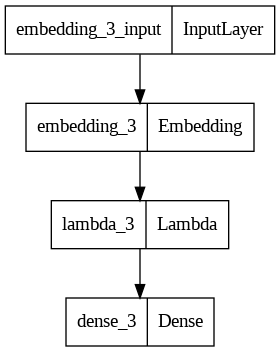

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# 학습된 임베딩 레이어 호출
embeddings = model.get_layer('embedding_3').get_weights()[0]

# 가장 유사한 단어 생성
def find_similar_words(word, embeddings, word_index, index_word, num_similar=5):
    # 조회하려는 단어 인덱스
    word_idx = word_index[word]

    # 해당 단어의 임베딩
    word_embedding = embeddings[word_idx]

    # 다른 단어들과의 임베딩 유사도 계산
    dot_products = np.dot(embeddings, word_embedding)
    norms = np.linalg.norm(embeddings, axis=1) * np.linalg.norm(word_embedding)
    similarities = dot_products / norms

    # 가장 유사한 단어들 n개 조회
    top_indices = np.argsort(similarities)[::-1][:num_similar + 1]

    # 단어 정보
    similar_words = [index_word[i] for i in top_indices if i != word_idx]

    return similar_words

In [ ]:
# 역맵핑을 위한 인덱스-단어 딕셔너리
index_word = {v: k for k, v in word_index.items()}

# 유사한 단어 조회 가능
word = 'dogs'
similar_words = find_similar_words(word, embeddings, word_index, index_word)
print(f"Words similar to {word}:", similar_words)

Words similar to dogs: ['sunny', 'dog', 'on', 'log', 'are']


# gensim 사용

In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
sentences = brown.sents()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
from gensim.models import Word2Vec

# skip-gram 사용
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

In [ ]:
embeddings = model.wv.vectors

In [ ]:
embeddings[0]

array([ 0.2842936 ,  0.15574385, -0.01299703,  0.05431806, -0.24827328,
       -0.164885  ,  0.4116711 ,  0.8802136 , -0.48145637, -0.40427065,
        0.16327646,  0.10551166,  0.06436057,  0.02513825, -0.07776772,
       -0.29986244,  0.2662476 ,  0.3504934 , -0.20936011, -0.6256339 ,
        0.21877825,  0.3343252 ,  0.80171037,  0.27204427,  0.06384441,
       -0.16911678, -0.3550396 , -0.02345242, -0.32407746, -0.01814737,
        0.38926092, -0.09227154,  0.25944573, -0.03406914, -0.0528205 ,
       -0.02831274,  0.34791055, -0.26719695, -0.07484553,  0.00241985,
        0.10781836, -0.04940092,  0.11739138,  0.2633873 ,  0.14608403,
       -0.33869654, -0.24397975,  0.13907813, -0.18955559,  0.5481781 ,
       -0.37511367,  0.05424632, -0.46526143, -0.01710498, -0.19844557,
       -0.25200593,  0.36481544, -0.12184516, -0.23044012,  0.26078582,
        0.05410967, -0.02299488,  0.01384786,  0.01526814, -0.6311078 ,
        0.37018126,  0.49292877,  0.06966745, -0.11493612, -0.15

In [ ]:
word = 'college'
similar_words = model.wv.most_similar(word)
print(f"Words similar to '{word}':", similar_words)

Words similar to 'college': [('mature', 0.9208441376686096), ('university', 0.9208143353462219), ('student', 0.9156693816184998), ('finding', 0.9127916693687439), ('spending', 0.9059777855873108), ('friendly', 0.9032744765281677), ('academic', 0.8970388174057007), ('romantic', 0.895272433757782), ('school', 0.8930315971374512), ('prestige', 0.8916623592376709)]


In [ ]:
from scipy.spatial.distance import cosine

def sentence_avg_embedding(sentence, embeddings, wv_index):
    words = sentence.split()
    avg_embedding = np.mean([embeddings[wv_index[word]] for word in words if word in wv_index], axis=0)
    return avg_embedding

sentences = [
    'a sweater with diamond pattern',
    'a white top of jewelry image',
    'black jeans with dark stripes',
]

avg_embeddings = [sentence_avg_embedding(sentence, embeddings, model.wv.key_to_index) for sentence in sentences]

similarities = [
    cosine(avg_embeddings[0], avg_embeddings[1]),
    cosine(avg_embeddings[0], avg_embeddings[2]),
    cosine(avg_embeddings[1], avg_embeddings[2]),
]

print('Cosine similarities:', similarities)

Cosine similarities: [0.08580565452575684, 0.10836821794509888, 0.16600918769836426]
